## 1.Data Collection and Preprocessing


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("employee_data.csv")

In [3]:
df.sample(3)

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
78,79,Matthew Walker,30,Sales,62000,4,80,No
73,74,Daniel Mitchell,36,Engineering,90000,13,94,Yes
96,97,Thomas Harris,40,Engineering,91000,13,92,Yes


In [4]:
df.info()  #Checking the info the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [5]:
df.duplicated().sum()  # Checking for the duplicate values in the dataset

0

In [6]:
df['Department'].unique()  # No inconsistent data present in this feature

array(['Sales', 'HR', 'Engineering', 'Marketing'], dtype=object)

In [7]:
df['Salary'].describe()

count      100.000000
mean     72820.000000
std      12643.823102
min      43000.000000
25%      65000.000000
50%      72000.000000
75%      82750.000000
max      95000.000000
Name: Salary, dtype: float64

**Feature Engineering**

In [8]:
#Removing Unnecessary features 
df = df.drop(columns = ['EmployeeID', 'Name'])

In [9]:
#Encoding Department and attribute features 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
df['Department'] =le.fit_transform(df['Department'])
df['Attrition'] =le.fit_transform(df['Attrition'])

In [11]:
df.head()

,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,29,3,55000,3,80,0
1,35,1,60000,7,85,0
2,40,0,80000,10,95,1
3,28,2,65000,5,78,0
4,50,3,75000,20,88,1


## 2. Exploratory Data Analysis (EDA)


In [12]:
df.describe()

,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,36.570000,1.440000,72820.000000,10.800000,84.940000,0.390000
std,8.318478,1.157496,12643.823102,6.361183,6.349771,0.490207
min,25.000000,0.000000,43000.000000,1.000000,70.000000,0.000000
25%,29.750000,0.000000,65000.000000,5.000000,80.000000,0.000000
50%,35.000000,1.000000,72000.000000,10.000000,85.500000,0.000000
75%,41.250000,3.000000,82750.000000,16.000000,90.000000,1.000000
max,60.000000,3.000000,95000.000000,25.000000,95.000000,1.000000


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

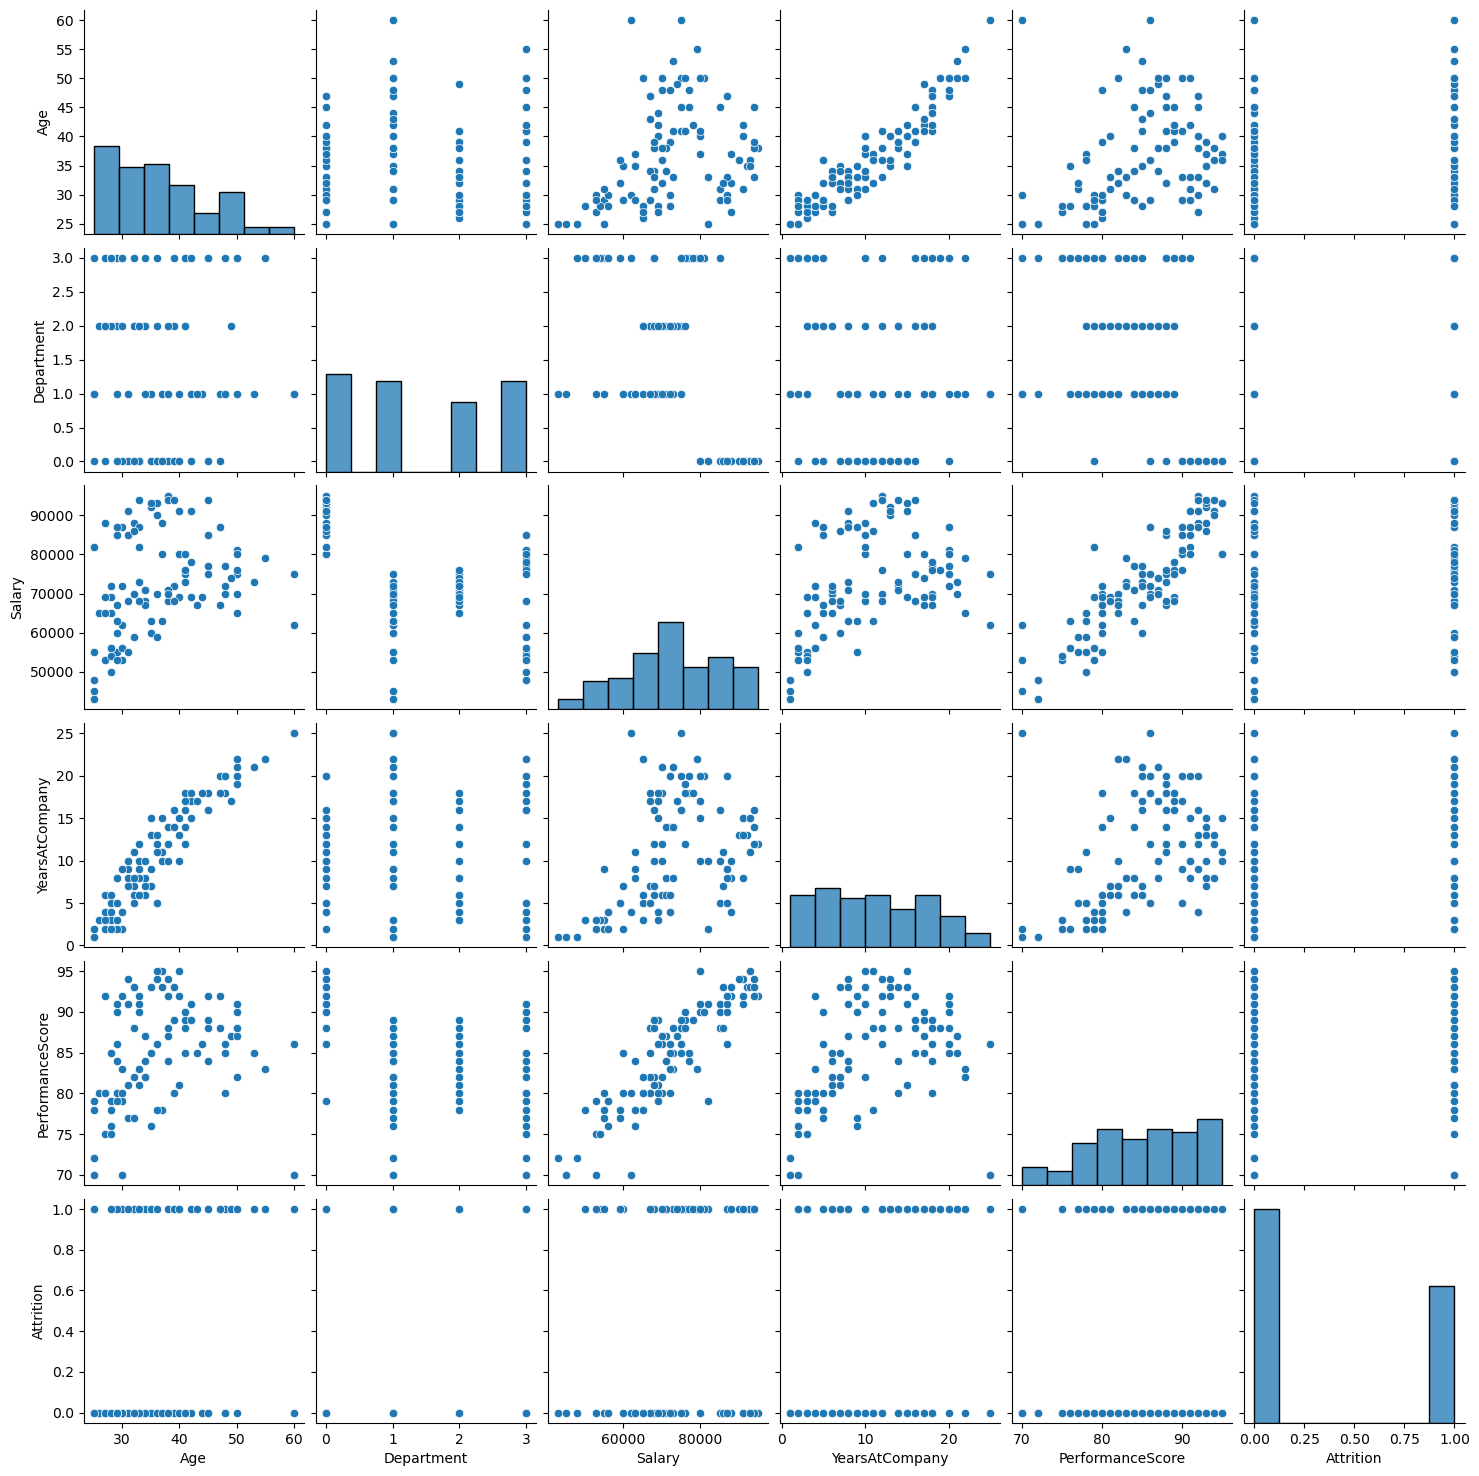

In [14]:
sns.pairplot(df)

In [15]:
df.head(1)

,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,29,3,55000,3,80,0


In [16]:
new_df = df[['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore', 'Department', 'Attrition']]

<Axes: >

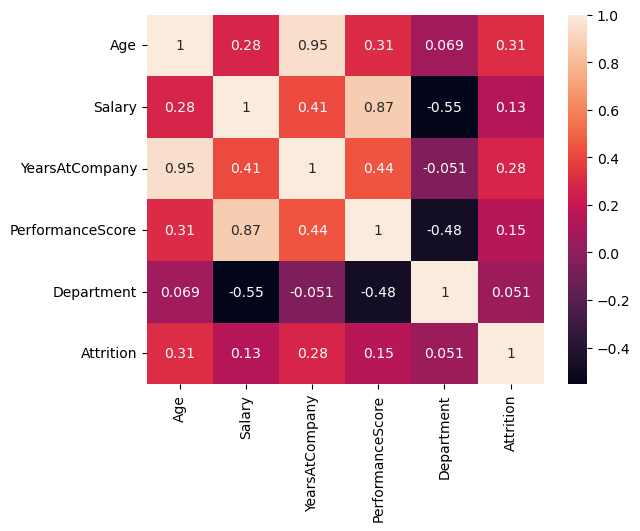

In [17]:
sns.heatmap(new_df.corr(), annot =True)

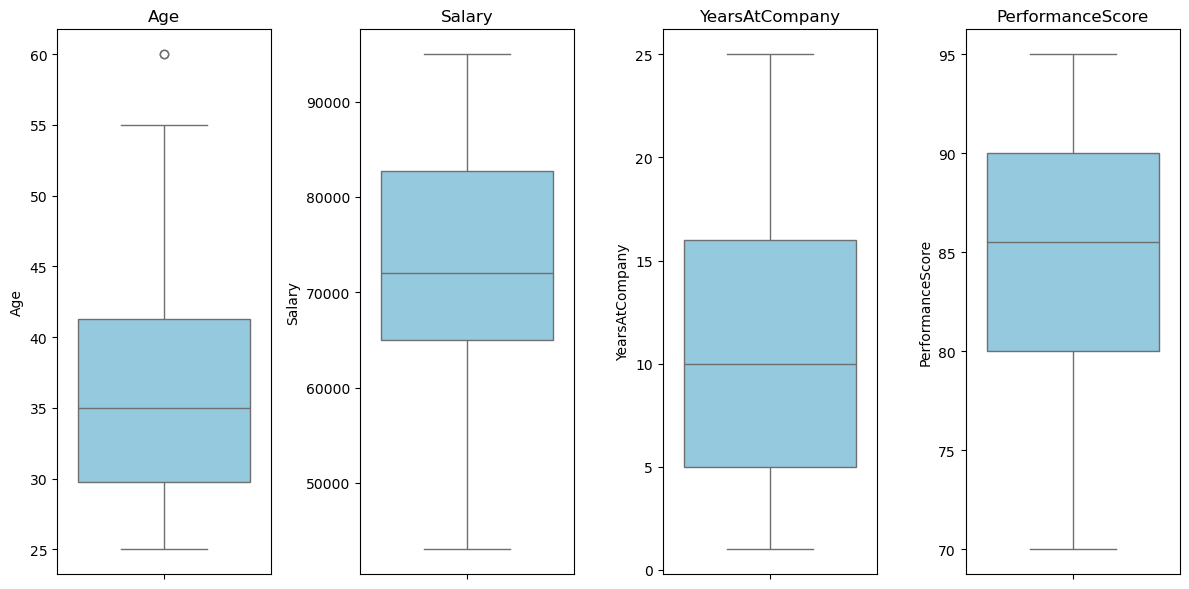

In [18]:
num_cols = ["Age", "Salary", "YearsAtCompany", "PerformanceScore"]

# Plot boxplots for each numeric feature
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)   # one subplot per feature
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()
#No outliers are present 

## 3. Probability and Statistical Analysis

**4.Feature Engineering and Encoding**

df.head()

In [19]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [20]:
features =['Salary', 'PerformanceScore']
df[features] = mms.fit_transform(df[features])

**5. Employee Attrition Prediction Model**

In [21]:
X= df.iloc[:, :-1]
y= df.iloc[:, -1]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [112]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

In [113]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [114]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [115]:
y_pred = rfc.predict(X_test)

In [116]:
accuracy_score(y_test, y_pred)

0.75

In [117]:
recall_score(y_test, y_pred)

0.5714285714285714

In [118]:
precision_score(y_test, y_pred)

0.6666666666666666

In [119]:
f1_score(y_test, y_pred)

0.6153846153846154

In [122]:
from sklearn.metrics import confusion_matrix

In [124]:
confusion_matrix(y_test,y_pred)


array([[11,  2],
       [ 3,  4]], dtype=int64)

**6. Employee Performance Prediction Model**

In [126]:
df.sample()

,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
13,48,1,0.519231,18,0.4,0


In [128]:
X1= df.drop(columns = ['PerformanceScore', 'Attrition'])
y1= df['PerformanceScore']

In [129]:
X1_train,X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [131]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [132]:
lr.fit(X1_train, y1_train)

LinearRegression()

In [134]:
y1_pred = lr.predict(X1_test)

In [137]:
from sklearn.metrics import r2_score, mean_squared_error

In [138]:
r2 = r2_score(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)

In [139]:
r2

0.7514693739822028

In [140]:
mse

0.02030395802314997

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

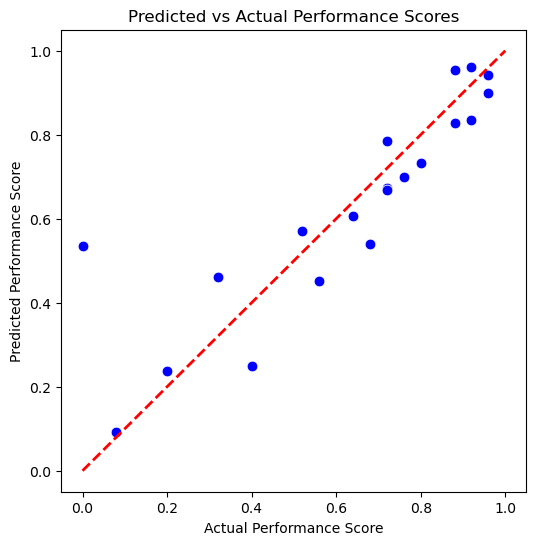

In [144]:
plt.figure(figsize = (6,6))
sns.scatterplot(x=y1_test, y=y1_pred, color='b', s=60)
plt.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'r--', lw=2)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Predicted vs Actual Performance Scores")
plt.show()

**7.Deep Learning for Employee Performance Prediction**

In [147]:
df.sample()

,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
66,28,3,0.25,4,0.36,0


In [181]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [192]:
X2 = df.drop(columns = ['PerformanceScore', 'Attrition', 'YearsAtCompany'])
y2 = df['PerformanceScore']

In [193]:
X2_train,X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [207]:
model = Sequential()

model.add(Dense(16, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [208]:
model.compile(loss=['mse'],metrics=['accuracy'])

In [209]:
model.fit(X2_train, y2_train, epochs = 100) #Very poor accuracy due to small dataset

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0250 - loss: 26.1699  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0250 - loss: 20.9434    
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0250 - loss: 17.8972     
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0250 - loss: 15.5848 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0250 - loss: 13.6970 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0250 - loss: 12.0228
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0250 - loss: 10.5812 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0250 - loss: 9.3293 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0250 - loss: 8.2049     
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0250 - loss: 6.7406    
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0250 - loss: 2.8074     
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 

In [201]:
model.predict(X2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


array([[0.4773322 ],
       [0.58014834],
       [0.62915105],
       [0.45368323],
       [0.76173437],
       [0.24857193],
       [0.6173803 ],
       [0.73732316],
       [0.9480764 ],
       [0.26533622],
       [0.38580662],
       [0.48638517],
       [0.72514737],
       [0.5549707 ],
       [0.7769687 ],
       [0.6158502 ],
       [0.7150285 ],
       [0.6855604 ],
       [0.4658597 ],
       [0.5992095 ]], dtype=float32)

**8. Employee Attrition Analysis with Deep Learning**

In [256]:
X3 = df.drop(columns = ['Attrition','YearsAtCompany', 'Salary'])
y3 = df['Attrition']

In [257]:
X3_train,X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [258]:
model2 = Sequential()
model2.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [259]:
model.compile(loss= 'binary_crossentropy', optimizer= 'Adam', metrics = ['accuracy'])

In [260]:
model.fit(X3_train, y3_train, epochs= 25)

Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6000 - loss: 0.6903
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6000 - loss: 0.6898
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6000 - loss: 0.6892
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6000 - loss: 0.6888
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6000 - loss: 0.6884 
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6000 - loss: 0.6879
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6000 - loss: 0.6874
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6000 - loss: 0.6870
Epoch 9/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6000 - loss: 0.6865
Epoch 10/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6000 - loss: 0.6862
Epoch 11/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6000 - loss: 0.6859
Epoch 12/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6000 - loss: 0.6853

In [264]:
y3_pred_prob = model.predict(X3_test)
y3_pred = (y3_pred_prob > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [265]:
acc = accuracy_score(y3_test, y3_pred)
prec = precision_score(y3_test, y3_pred)
rec = recall_score(y3_test, y3_pred)
f1 = f1_score(y3_test, y3_pred)

C:\Users\prate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [266]:
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

Accuracy : 0.65
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0
